<a href="https://www.kaggle.com/code/samithsachidanandan/neural-network-learns-sine-function-using-autodiff?scriptVersionId=285808966" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import Libraries

In [1]:
import jax 
import jax.numpy as jnp
import matplotlib.pyplot as plt 

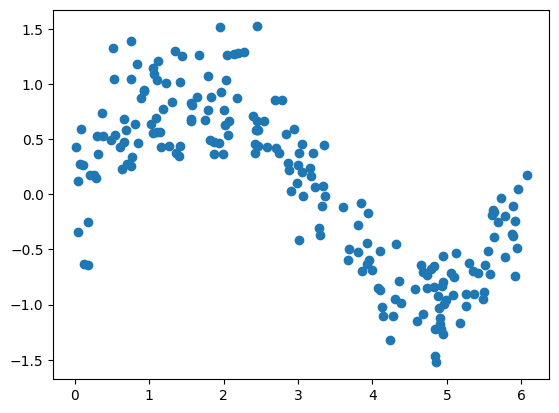

In [2]:
N_SAMPLES = 200
LAYERS = [1, 10, 10, 10, 1]
LEARNING_RATE = 0.1
N_EPOCHS = 30_000

key = jax.random.PRNGKey(42)

key, xkey, ynoisekey = jax.random.split(key, 3)

x_samples = jax.random.uniform(
    xkey, (N_SAMPLES, 1), minval=0.0, maxval=2 * jnp.pi
)

y_samples = jnp.sin(x_samples) + jax.random.normal(
    ynoisekey, (N_SAMPLES, 1)
) * 0.3

plt.scatter(x_samples, y_samples)
plt.show()


### Weight Intiliazation 

In [3]:
weight_matrices = []
bias_vectors = []
activation_functions = []

for (fan_in, fan_out) in zip(LAYERS[:-1], LAYERS[1:]):
    kernel_matrix_uniform_limit = jnp.sqrt(6 / (fan_in + fan_out))
    key , wkey = jax.random.split(key)

    W = jax.random.uniform(
        wkey, 
        (fan_in, fan_out), 
        minval = -kernel_matrix_uniform_limit,
        maxval = +kernel_matrix_uniform_limit,    
        )

    b = jnp.zeros(fan_out)

    weight_matrices.append(W)
    bias_vectors.append(b)
    activation_functions.append(jax.nn.sigmoid)

activation_functions[-1] = lambda x : x 



In [4]:
def network_forward(x, weights, biases, activations):
    a = x
    for W, b, f in zip(weights, biases, activations):
        a = f(a @ W + b)
    return a

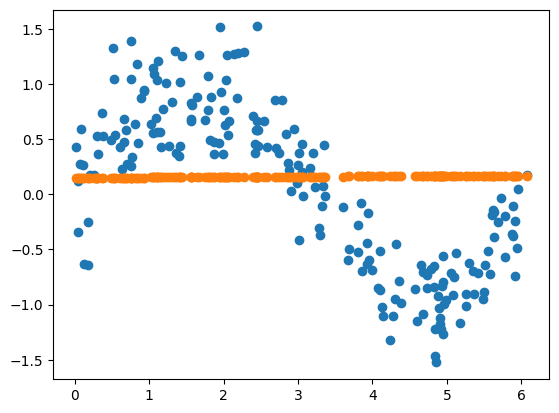

In [5]:
plt.scatter(x_samples, y_samples)
plt.scatter(x_samples, network_forward(x_samples, weight_matrices, bias_vectors,activation_functions ))
plt.show()


In [6]:
def loss_forward(y_guess, y_ref  ):
    delta =y_guess - y_ref
    return 0.5 * jnp.mean(delta**2)

In [7]:
loss_forward(
    network_forward(x_samples, weight_matrices, bias_vectors,activation_functions ),
    y_samples
    
)

Array(0.28443, dtype=float32)

In [8]:
loss_and_grad_fun = jax.value_and_grad(
    lambda Ws, bs: loss_forward(
        network_forward(
            x_samples,
            Ws,
            bs, 
            activation_functions,
            ),
            y_samples,
        ),
        argnums=(0,1),
    )

In [9]:
initial_loss, (initial_weight_gradient, initial_bias_gradient) = loss_and_grad_fun(
    weight_matrices, 
    bias_vectors,
)

In [10]:
initial_loss

Array(0.28443, dtype=float32)

In [11]:
initial_weight_gradient

[Array([[ 0.00091228,  0.00015875, -0.01608167, -0.00049182, -0.00010407,
         -0.00800303, -0.00064232, -0.00237064, -0.00015847, -0.00090652]],      dtype=float32),
 Array([[-7.5154137e-05,  3.3338400e-04,  1.1344472e-04,  4.4245028e-04,
          3.4349973e-04, -4.9868040e-04, -3.8573128e-04,  1.5519075e-04,
          1.5846523e-04, -2.5762318e-04],
        [ 2.7194191e-04, -1.4746569e-03, -8.5741875e-04, -7.5509079e-04,
         -2.0462871e-03,  1.9731596e-03,  1.2543388e-03, -1.4676378e-03,
         -7.5843633e-04,  1.2185266e-03],
        [-2.3593253e-04,  1.1757945e-03,  5.7134725e-04,  9.8184322e-04,
          1.4650890e-03, -1.6467520e-03, -1.1430489e-03,  9.2344824e-04,
          5.8654207e-04, -9.4656425e-04],
        [ 2.6649356e-04, -1.4480355e-03, -8.4512052e-04, -7.3080900e-04,
         -2.0140205e-03,  1.9354580e-03,  1.2277553e-03, -1.4480667e-03,
         -7.4524898e-04,  1.1972014e-03],
        [-8.3567906e-04,  4.3046325e-03,  2.2567767e-03,  3.0362974e-03,
    

In [12]:
loss_and_grad_fun = jax.jit(loss_and_grad_fun)

### Training Loop 

In [13]:
loss_history = []
for epoch in range(N_EPOCHS):
    loss, (weight_gradients, bias_gradients) = loss_and_grad_fun(
        weight_matrices,
        bias_vectors,
    )

    weight_matrices = jax.tree.map(
        lambda W, W_grad: W - LEARNING_RATE * W_grad,
        weight_matrices,
        weight_gradients
    )
    bias_vectors = jax.tree.map(
        lambda b, b_grad: b - LEARNING_RATE * b_grad,
        bias_vectors,
        bias_gradients,
    )

    if epoch % 100 == 0:
        print(f"epoch: {epoch}, loss: {loss}")
    
    loss_history.append(loss)

epoch: 0, loss: 0.28442999720573425
epoch: 100, loss: 0.27378013730049133
epoch: 200, loss: 0.2683931589126587
epoch: 300, loss: 0.2615237236022949
epoch: 400, loss: 0.25157463550567627
epoch: 500, loss: 0.2365180104970932
epoch: 600, loss: 0.2143135368824005
epoch: 700, loss: 0.18570412695407867
epoch: 800, loss: 0.15848180651664734
epoch: 900, loss: 0.14099781215190887
epoch: 1000, loss: 0.13192500174045563
epoch: 1100, loss: 0.1270095407962799
epoch: 1200, loss: 0.12401548027992249
epoch: 1300, loss: 0.12198231369256973
epoch: 1400, loss: 0.12047040462493896
epoch: 1500, loss: 0.11925956606864929
epoch: 1600, loss: 0.11822974681854248
epoch: 1700, loss: 0.11731057614088058
epoch: 1800, loss: 0.11645839363336563
epoch: 1900, loss: 0.1156449094414711
epoch: 2000, loss: 0.11485125124454498
epoch: 2100, loss: 0.11406486481428146
epoch: 2200, loss: 0.11327743530273438
epoch: 2300, loss: 0.11248374730348587
epoch: 2400, loss: 0.11168081313371658
epoch: 2500, loss: 0.11086732894182205
epoc

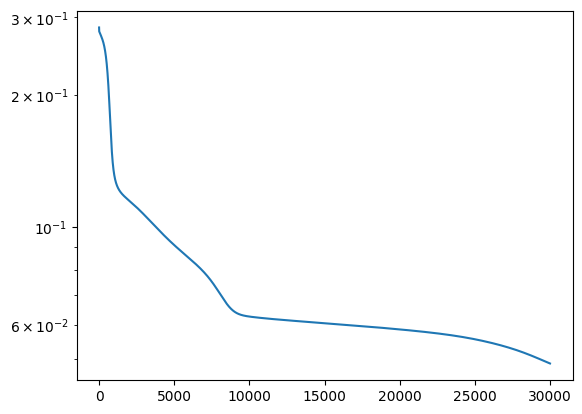

In [14]:
plt.plot(loss_history)
plt.yscale('log')


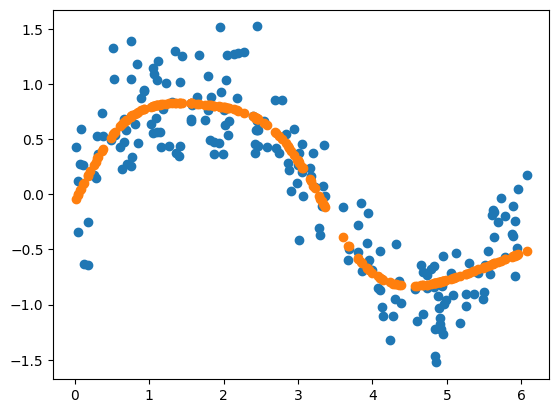

In [15]:
plt.scatter(x_samples, y_samples)
plt.scatter(x_samples, network_forward(x_samples, weight_matrices, bias_vectors,activation_functions ))
plt.show()
